In [90]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the json/dictionary data

In [91]:
data = "C:\\Users\\aleks\\Documents\\GitHub\\thesis\\src\\export-data\\vrengja-tobar40.json"
with open(data, 'r') as f:
    track_data = json.load(f)

# Simple 2D Plot of Beat Ratios

In [92]:
filename = list(track_data)[0]
key_dict = track_data[filename]["ratios"]["beat_ratios"]

In [93]:
def plotting_beat_ratios(from_beat, to_beat):
    fig, ax = plt.subplots()
    width = 0.2  # the width of the bars

    labels = []
    beat1 = []
    beat2 = []
    beat3 = []

    for i, beat in enumerate(list(key_dict.values())):
        if i>=(from_beat-1) and i<(to_beat):
            beat1.append(beat[0])
            beat2.append(beat[1])
            beat3.append(beat[2])
            labels.append(list(key_dict)[i])
    
    x = np.arange(len(labels))  # the label locations

    ax.bar(x - width, beat1, width, label='beat1')
    ax.bar(x, beat2, width, label='beat2')
    ax.bar(x + width, beat3, width, label='beat3')

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Beat Ratios')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    return fig

We can plot multiple sections/patterns of Beat Ratios as well

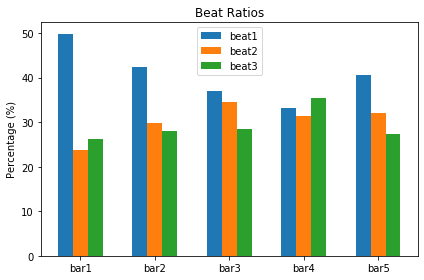

In [94]:
fig1 = plotting_beat_ratios(1, 5)

#fig2 = plotting_beat_ratios(14, 16)

## Plot the beat ratios of specifc harmonic patterns 

In [95]:
#updated function
def plotting_harm_pattr_beat(pattern):
    # create a plot
    fig, ax = plt.subplots()
    
    # the width of the bars
    width = 0.2
    
    # collect all the relevant bar numbers
    harm_pattr_beats = []
    for i in range(len(pattern)):
        if i%2 == 0:
            if i != (len(pattern)-1):
                count = pattern[i]
                while count <= pattern[i+1]:
                    harm_pattr_beats.append(count)
                    count += 1
            else:
                harm_pattr_beats.append(pattern[i])
                break

    labels = []
    beat1 = []
    beat2 = []
    beat3 = []

    for i, beat in enumerate(list(key_dict.values())):
        if i+1 in harm_pattr_beats:
            beat1.append(beat[0])
            beat2.append(beat[1])
            beat3.append(beat[2])
            labels.append(list(key_dict)[i])
    
    x = np.arange(len(labels))  # the label locations

    ax.bar(x - width, beat1, width, label='beat1')
    ax.bar(x, beat2, width, label='beat2')
    ax.bar(x + width, beat3, width, label='beat3')

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Beat Ratios')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    return fig

In [97]:
# The harmonic patterns of the track in 2D array format.

harmonic_patterns_dict = track_data[filename]["harmonic_patterns"]
harm_patterns_lst = []
for i, item in enumerate(harmonic_patterns_dict) :
    harm_patterns_lst.append(harmonic_patterns_dict[item])
    
harm_patterns_lst

[[1, 3, 4, 6],
 [7, 11, 12, 16],
 [17, 18, 19, 20, 29, 30, 31, 32],
 [17, 28, 29, 40],
 [1, 1, 4, 4, 7, 7, 12, 12],
 [2, 3, 5, 6, 10, 11, 15, 16],
 [17, 17, 19, 19, 21, 21, 23, 23, 33, 33, 35, 35],
 [21, 22, 23, 24, 33, 34, 35, 36],
 [8, 11, 13, 16, 25, 28, 37, 40],
 [3, 3, 6, 6, 11, 11, 16, 16, 28, 28, 40, 40]]

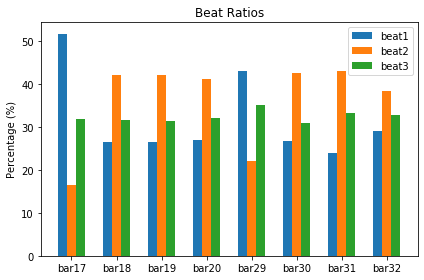

In [98]:
# Then we can index which pattern we want to plot the beat ratios too.
fig1 = plotting_harm_pattr_beat(harm_patterns_lst[2])

# Duration distributions of the beats

In [99]:
color_dict = {1 : '#FF0000', 2 : '#0000FF', 3: "#000000"}
df_dict = pd.DataFrame.from_dict(key_dict, orient="index", columns=[1, 2, 3])
df_dict.head()

,1,2,3
bar1,49.903382,23.768116,26.328502
bar2,42.342978,29.710656,27.946366
bar3,36.951501,34.565050,28.483449
bar4,33.260553,31.368268,35.371179
bar5,40.534171,32.128830,27.336999


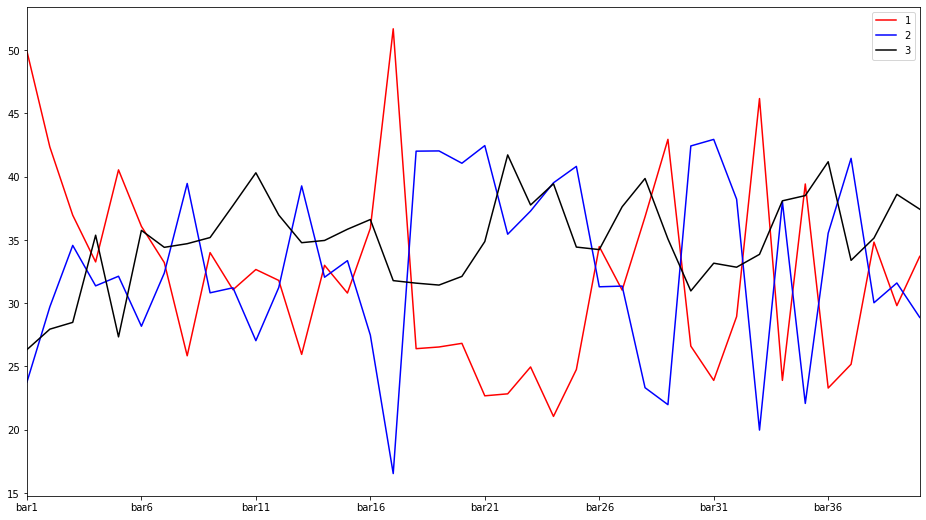

In [100]:
df_dict.plot(figsize=(16, 9), color=[color_dict.get(x) for x in df_dict.columns])

I manaully filled in beat nr.2 of bar number 17, 29 and 33. Notice the spike on bar 17.. Lets remove these to be more consistent. 

In [101]:
df_dict_cleaned = df_dict.drop(['bar17', 'bar29', "bar33"])

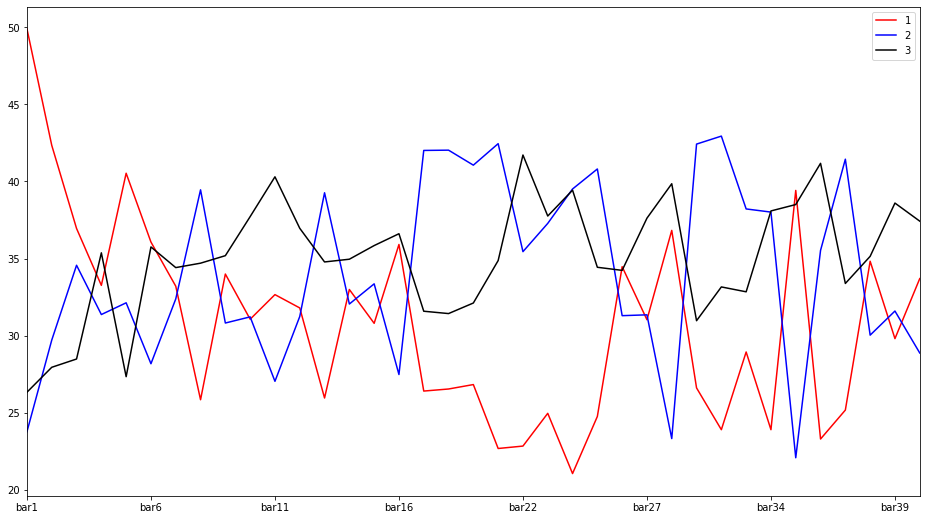

In [102]:
df_dict_cleaned.plot(figsize=(16, 9), color=[color_dict.get(x) for x in df_dict.columns])

In the avobe plot, we can see the fairly consistent timing distribution across harmonic patterns. However, the durations of the individual beats change quite a bit from bar to bar. 

Of course, here you also see the beats "motion" twords the next instance of that beat in the next bar, which actually makes little sense.

So something like a dot diagram is more instructive. Lets plot the timing patterns of a specific harmonic pattern as dot diagrams.

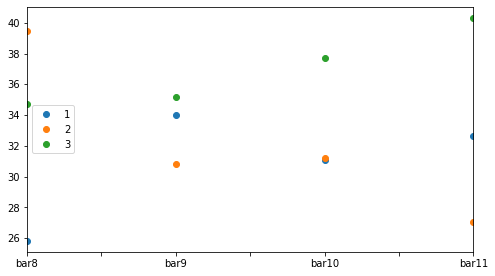

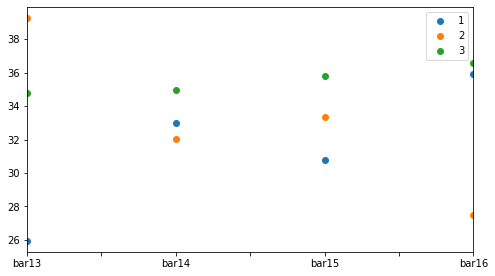

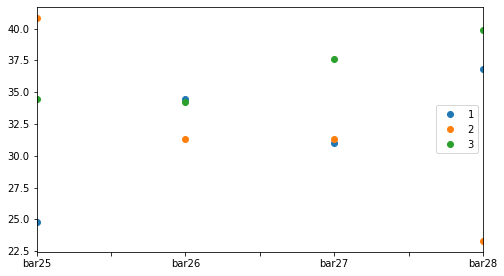

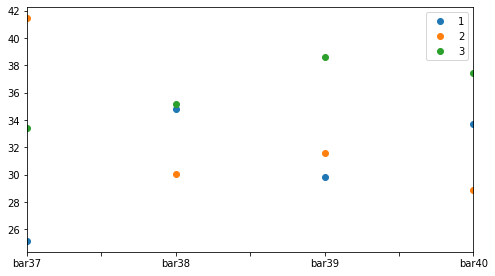

In [103]:
pattern = harm_patterns_lst[8]

count = 0
while count < len(pattern)-1:
    start = "bar"+str(pattern[count])
    end = "bar"+str(pattern[count+1])
    df_dict_cleaned.loc[start:end].plot(figsize=(8, 4.5), style='o')
    count += 2


We see in the above example that the beat durations of harmonic patterns tend to **switch up** quite a bit across repitions, while the general timing patterns tends to be consistent. This is in line with what players refer to as intetionally "incorporating some varation when repeating motifs".

## Histogram representation of individual beat duration frequency

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'beat duration precentage %'),
 Text(0.5, 1.0, 'all together')]

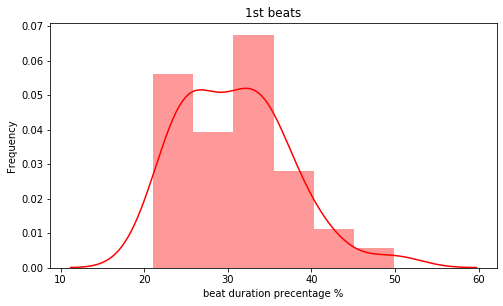

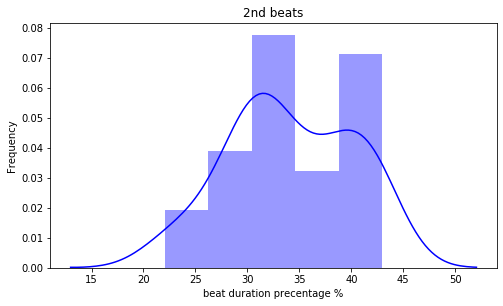

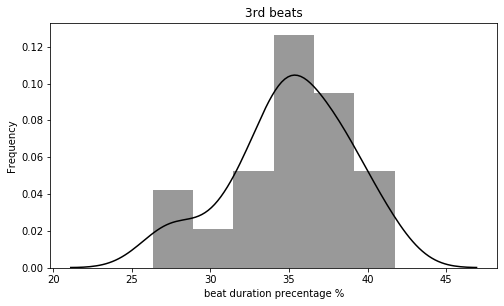

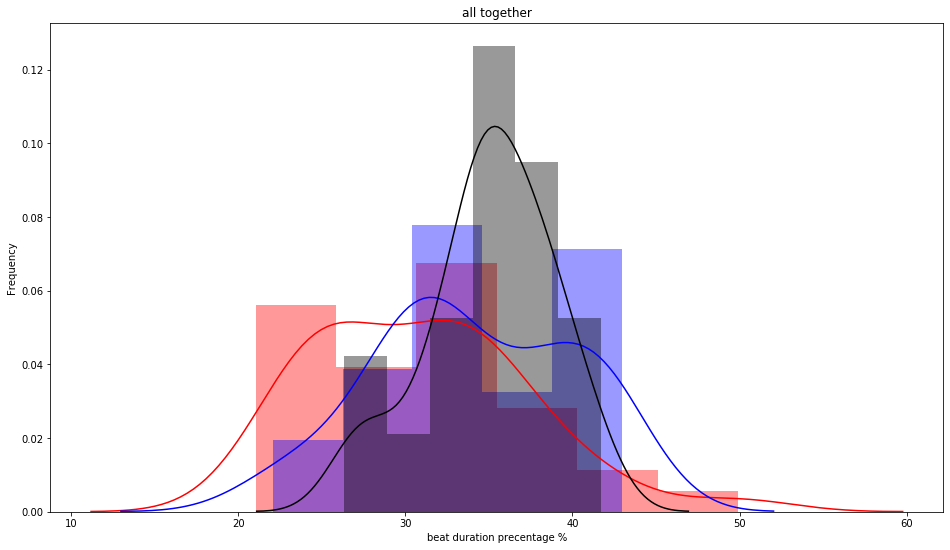

In [104]:
# Seperatly
fig, ax1 = plt.subplots(figsize=(8, 4.5))
plotax1 = sns.distplot(df_dict_cleaned[1], ax=ax1, color=[1,0,0])
plotax1.set(xlabel='beat duration precentage %', ylabel='Frequency', title="1st beats")

fig, ax2 = plt.subplots(figsize=(8, 4.5))
plotax2 = sns.distplot(df_dict_cleaned[2], ax=ax2, color=[0,0,1])
plotax2.set(xlabel='beat duration precentage %', ylabel='Frequency', title="2nd beats")

fig, ax3 = plt.subplots(figsize=(8, 4.5))
plotax3 = sns.distplot(df_dict_cleaned[3], ax=ax3, color=[0,0,0])
plotax3.set(xlabel='beat duration precentage %', ylabel='Frequency', title="3rd beats")

# All together
fig,ax4 = plt.subplots(figsize=(16,9))
sns.distplot(df_dict_cleaned[1], ax=ax4, color=[1,0,0])
sns.distplot(df_dict_cleaned[2], ax=ax4, color=[0,0,1])
sns.distplot(df_dict_cleaned[3], ax=ax4, color=[0,0,0])
ax4.set(xlabel='beat duration precentage %', ylabel='Frequency', title="all together")

Here we can say that the track tends to have the pattern "short, average, long". If we must.

# Correlation between amount of notes in the beats and the length of those beats

Here we could also explore whether ornamented beats usually are prolonged or not. This representation does **not** include ornamentation notes.

In [105]:
# Create dataframe of the number of notes in every beat
filename = list(track_data)[0]
key_ndr = track_data[filename]["ratios"]["note_duration_ratios"]

lst_ndr = list(key_ndr.values())
lst_ndr_len = []
for i in range(len(lst_ndr)):
    if type(lst_ndr[i]) is list:
        lst_ndr_len.append(len(lst_ndr[i]))
    else:
        lst_ndr_len.append(1)

df_ndr_len = pd.DataFrame(lst_ndr_len, index=list(key_ndr), columns=["note_amount"])

In [106]:
# Concat with dataframe of the duration of every beat
filename = list(track_data)[0]
key_beat_dur = track_data[filename]["beat_onset_and_duration"]

# delete the "ending marker"
dict_copy = key_beat_dur.copy()
#del dict_copy[list(key_beat_dur)[-1]]

df_bd = pd.DataFrame.from_dict(dict_copy, orient="index", columns=["onsets", "duration(ms)"])
del df_bd["onsets"]

In [107]:
# merge them together
df_ndr_bd = pd.concat([df_ndr_len, df_bd], axis=1, sort=False)
df_ndr_bd

,note_amount,duration(ms)
beat1.1,4,1033.00
beat1.2,3,492.00
beat1.3,2,545.00
beat2.1,4,600.00
beat2.2,3,421.00
...,...,...
beat39.2,2,406.00
beat39.3,3,496.00
beat40.1,5,447.00
beat40.2,2,383.00


In [108]:
print("Mean value of the beat duration duration(ms)")
print(df_ndr_bd["duration(ms)"].mean())
print("-------------------------------")
print("Mean value of the note amount per beat")              
print(df_ndr_bd["note_amount"].mean())

Mean value of the beat duration duration(ms)
446.77858333333336
-------------------------------
Mean value of the note amount per beat
2.966666666666667


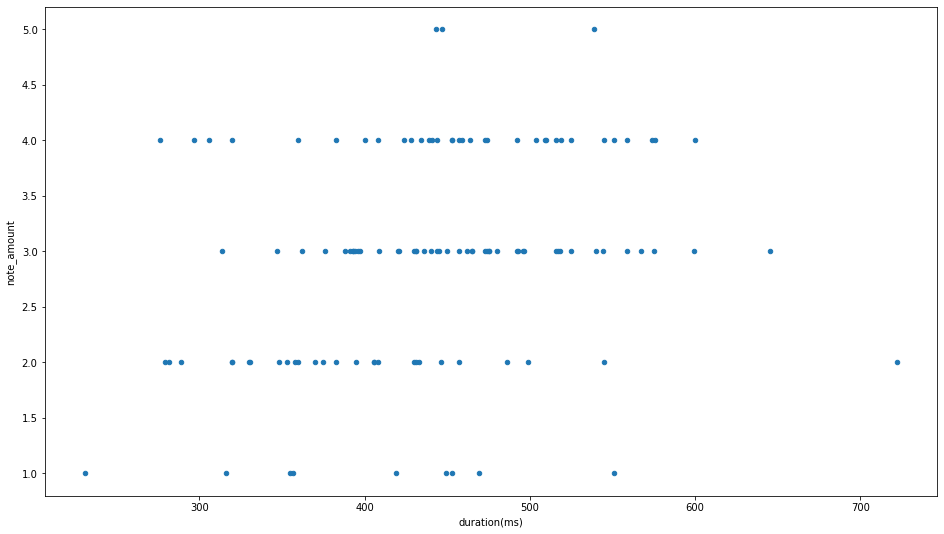

In [109]:
#df_ndr_bd.plot.scatter(figsize=(16, 9), x="duration(ms)", y="note_amount")

# Remove the "anomaly"
df_ndr_bd.loc["beat1.2":].plot.scatter(figsize=(16, 9), x="duration(ms)", y="note_amount")